In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:

def pull_arm(true_mean, true_std):
    """
    This function simulates pulling an arm (playing a slot machine) and returns a reward sampled
    from a normal distribution with a given mean (true_mean) and standard deviation (true_std)
    """
    return np.random.normal(true_mean, true_std)

# ε-Greedy algorithm
def epsilon_greedy(epsilon, estimated_means):
    """
    The epsilon_greedy function implements the ε-Greedy algorithm. With probability epsilon,
     it explores by choosing a random arm, and with probability 1 - epsilon,
     it exploits by choosing the arm with the highest estimated mean reward
    """
    if np.random.rand() < epsilon:
        # Explore: choose a random arm
        return np.random.randint(len(estimated_means))
    else:
        # Exploit: choose the arm with the highest estimated mean
        return np.argmax(estimated_means)

# Function to run the multi-armed bandit simulation
def run_bandit(num_arms, true_means, true_std_devs, epsilon, num_steps):
    estimated_means = np.zeros(num_arms)
    arm_counts = np.zeros(num_arms)
    total_rewards = 0
    average_rewards = []

    for step in range(num_steps):
        chosen_arm = epsilon_greedy(epsilon, estimated_means)
        reward = pull_arm(true_means[chosen_arm], true_std_devs[chosen_arm])

        # Update estimated mean and count for the chosen arm
        arm_counts[chosen_arm] += 1
        estimated_means[chosen_arm] += (reward - estimated_means[chosen_arm]) / arm_counts[chosen_arm]

        total_rewards += reward
        average_reward = total_rewards / (step + 1)
        average_rewards.append(average_reward)

    return average_rewards

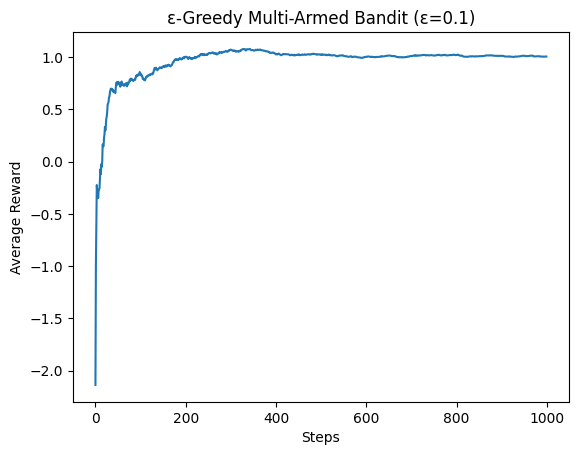

In [5]:
# Simulation parameters
num_arms = 5

# these values represent the true mean rewards of the different arms
true_means = np.random.normal(0, 1, num_arms)

# represents the true standard deviations of the rewards for each arm
true_std_devs = np.ones(num_arms)
epsilon = 0.1
num_steps = 1000

# Run the multi-armed bandit simulation
average_rewards = run_bandit(num_arms, true_means, true_std_devs, epsilon, num_steps)

# Plotting the results
plt.plot(average_rewards)
plt.title(f'ε-Greedy Multi-Armed Bandit (ε={epsilon})')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.show()